# Assignment 02
<p style='textalign:justify;'>Using both statistical analysis and macroeconomic modelling, students must identify a single key primary risk factor or economic variable and its effect on both the economy and methods in portfolio risk management, discussing the validity of their analysis in submission 1.</p>

In [1]:
'''Downloading requisite libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''selecting standard ipynb settings'''
%matplotlib inline

In [3]:
np.random.seed(0)

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)

In [7]:
'''set appropriate 'pwd' before executing this code, or change 'filepath...' argument below as appropriate. Ensure you have 
the datafile first'''
df01 = pd.read_csv(filepath_or_buffer='fredexport.csv', index_col=0)
df01.index = pd.to_datetime(arg=df01.index, errors='ignore')

In [8]:
'''Only the dataset between 1980 to 2017-05 have non-null values'''
variables = df01.loc['1980-01':'2017-05',:]
variables = variables.convert_objects(convert_numeric=True)
variables.ffill(axis=1,inplace=True)
variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 449 entries, 1980-01-01 to 2017-05-01
Data columns (total 11 columns):
CPI               449 non-null float64
exchange_rate     449 non-null float64
gsec_int_rates    449 non-null float64
t_int_rates       449 non-null float64
LTg_yields        449 non-null float64
M0                449 non-null float64
M1                449 non-null float64
M2                449 non-null float64
M3                449 non-null float64
total_reserves    449 non-null float64
Ex_Im             449 non-null float64
dtypes: float64(11)
memory usage: 42.1 KB


C:\Users\neelkanth mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Explanation of variables
<font size=1.8>I will provide for the details to be filled out in this section.<br> ToDo: prepare correlation matrix, drop one of variable pair with high correlation.</font>

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
variables_std = pd.DataFrame(data=std.fit_transform(variables), index=variables.index, columns=variables.columns.tolist())

In [10]:
variables_std.sample(10)

,CPI,exchange_rate,gsec_int_rates,t_int_rates,LTg_yields,M0,M1,M2,M3,total_reserves,Ex_Im
DATE,,,,,,,,,,,
1990-05-01,0.426399,-0.820535,1.105774,1.640569,1.105913,-0.748751,-0.766395,-0.757754,-0.731462,-0.758622,0.693246
1984-07-01,0.674997,-1.138562,0.812165,1.872209,0.812094,-0.859026,-0.869479,-1.034640,-1.042351,-0.769503,0.226438
2011-03-01,0.890448,0.365092,-0.949488,-1.139112,-0.950824,1.105196,2.323050,1.844309,1.729422,1.818280,0.086396
2008-07-01,1.188765,0.563161,-0.655879,0.019088,-0.657004,0.712622,1.774232,1.336765,1.230397,1.080209,-1.220665
1999-03-01,-1.181198,0.172602,0.812165,0.945648,0.812094,-0.423935,-0.104014,0.159948,0.241101,-0.551890,-0.100327
1991-03-01,0.244094,-0.817745,1.105774,1.408929,1.105913,-0.731624,-0.738292,-0.685742,-0.663049,-0.743510,0.553203
1981-01-01,-1.181198,-1.350580,-0.068661,-0.907472,-0.069365,-0.873149,-0.915097,-1.104255,-1.126251,-0.755600,0.693246
2007-09-01,-0.236528,0.420886,-1.243097,-0.444192,-1.244643,0.554421,1.654041,1.225613,1.121111,0.852319,-0.847219
2002-08-01,-0.286247,1.394495,-0.362270,0.019088,-0.363185,-0.188360,0.344201,0.845999,1.045594,-0.448523,0.413161


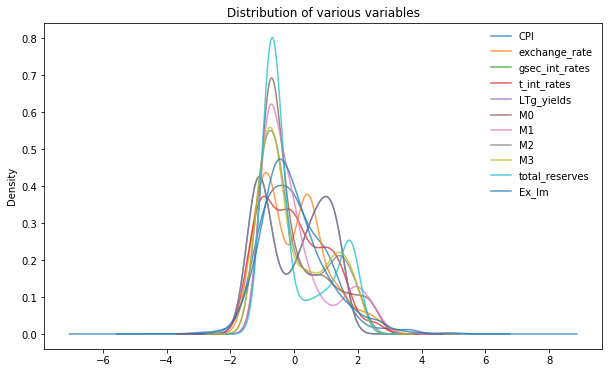

In [11]:
plt.rcParams['figure.figsize'] = (10,6)
for i in variables_std.columns:
    variables_std[i].plot.kde(alpha=0.75);
plt.legend(labels=variables_std.columns, frameon=False, loc='best')
plt.title('Distribution of various variables')
plt.show()

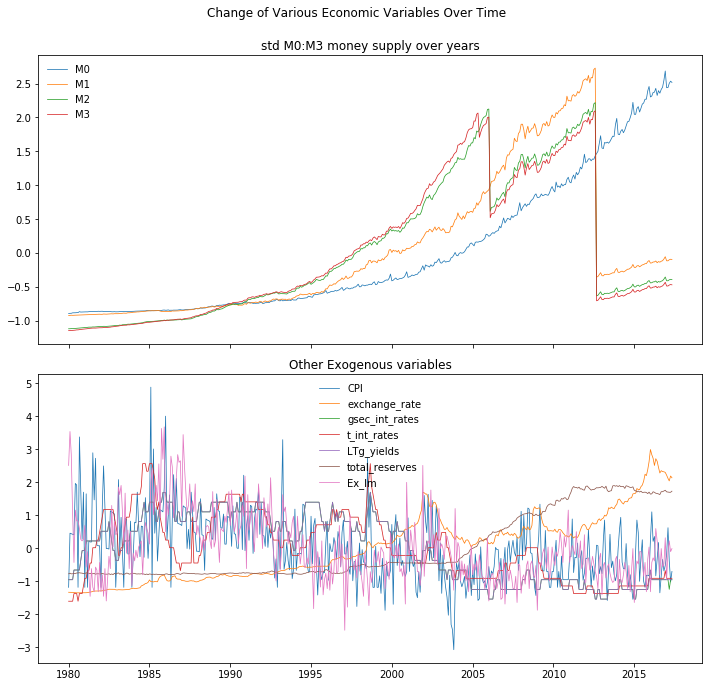

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True);
fig.set_size_inches(10,10)
ax1.plot(variables_std[['M0', 'M1', 'M2', 'M3']], linewidth=0.75)
ax1.legend(labels=['M0', 'M1', 'M2', 'M3'], frameon=False, loc='best')
ax1.set_title('std M0:M3 money supply over years')
ax2.plot(variables_std[['CPI', 'exchange_rate', 'gsec_int_rates', 't_int_rates', 'LTg_yields', 'total_reserves', 'Ex_Im']], linewidth=0.75);
ax2.legend(labels=['CPI', 'exchange_rate', 'gsec_int_rates', 't_int_rates', 'LTg_yields', 'total_reserves', 'Ex_Im'],loc='best', frameon=False)
ax2.set_title('Other Exogenous variables')
plt.suptitle('Change of Various Economic Variables Over Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<font size=1.8>Try percentage change</font>
#### Explain what PCA is
<font size=1.8>Please fill in this section with PCA and the purpose it serves in our objective. (I will try to share a write-up in due course)</font>

In [16]:
from sklearn.decomposition import PCA

In [17]:
components = PCA()
scaled_variables = components.fit_transform(variables_std.T)

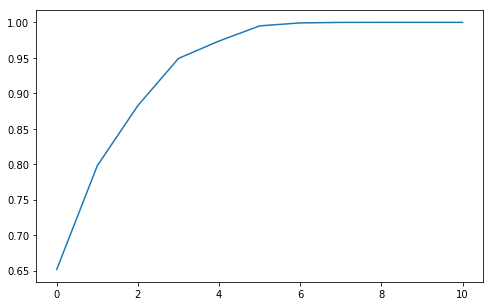

In [18]:
plt.rcParams['figure.figsize'] = (8,5)
pd.Series(data=components.explained_variance_ratio_, name='components').cumsum().plot.line();

2 components explain ~95% of variation; therefore we shall redecompose to just 2 variables

In [20]:
components_3 = PCA(n_components=3)
scaled_variables_3 = components_2.fit_transform(variables_std.T)
p_components = pd.DataFrame(data=scaled_variables_2, columns=['comp_1', 'comp_2', 'comp_3'], index=variables_std.columns.tolist())

print(f"{components_2.explained_variance_ratio_}")
print('='*80)
p_components

[0.65186588 0.14623317 0.08470548]


,comp_1,comp_2,comp_3
CPI,13.467840,-7.008099,5.446523
exchange_rate,-14.730180,-7.192177,-5.442619
gsec_int_rates,21.892947,1.870560,-3.935236
t_int_rates,18.594186,4.276022,-8.083514
LTg_yields,21.892244,1.840012,-3.942852
M0,-15.695856,-10.755027,-3.424759
M1,-15.042234,7.294268,2.770947
M2,-13.949123,11.287540,1.953746
M3,-13.308978,11.989229,1.825396
total_reserves,-16.172685,-9.004850,-1.411226


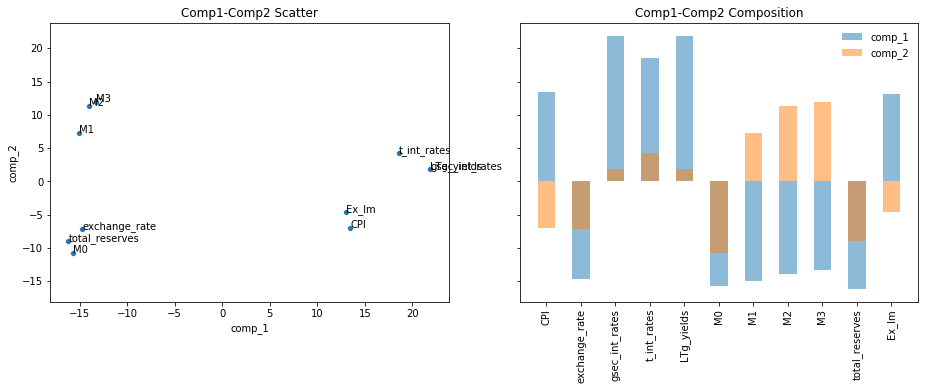

In [21]:
plt.rcParams['figure.figsize'] = (13,6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True);
sns.scatterplot(x=p_components.comp_1, y=p_components.comp_2, ax=ax1);
ax1.set_title('Comp1-Comp2 Scatter')
# ax1.legend(title=None, frameon=False, loc='best')
for sample in p_components.index:
    ax1.annotate(sample, (p_components.comp_1.loc[sample], p_components.comp_2.loc[sample]))
ax2.bar(x=p_components.index, height=p_components.comp_1, width=0.5, alpha=0.5);
ax2.bar(x=p_components.index, height=p_components.comp_2, width=0.5, alpha=0.5);
ax2.legend(labels=p_components.columns, loc='best', frameon=False, title=None)
ax2.set_title('Comp1-Comp2 Composition')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Comments on the graph:
In machine learning parlance;
1. Govt. security interest rates and T-bill (sovreign debt) explain greatest variability in data.
2. These 2 highest features is next followed by Net-exports, explaining significant bit in variability.
<br>*Change the comment section upon editing the notebook in the end.*
<font size=1.7>
1. Note 01: the quality of this analysis is directly dependent to the quality of the data. Good, unadjusted and granular dataset is difficult to come by. We found one on St. Louis FRED database.<br>
2. Note 02: this is a 'quick-n-dirty' analysis. The variables in the data do not depict gaussian distribution; neither is the time-series stationary. Hence the conclusion of the analysis should be taken with 'grain of salt'.
</font>

In [75]:
from sklearn.linear_model import LinearRegression